In [188]:

import numpy as np # импорт бибилиотеки numpy
import matplotlib.pyplot as plt # импорт модуля matplotlib.pyplot
from scipy import signal
from scipy.linalg import dft
import math
import sys
sys.path.insert(1, './')
import mylib


def plot(x, y, xlabel, ylabel, title):
    %matplotlib widget
    plt.figure(figsize=[8, 3])
    plt.plot(x, y)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.tight_layout()
    plt.minorticks_on()
    plt.grid(True, "minor")
    plt.show()
    
# for plotting several plots on the one figure

def plot2(xsPack, ysPack, xlabel, ylabel, title, legendsPack):
    %matplotlib widget
    plt.figure(figsize=[8, 3])
    plt.grid(True)
    for i in range(len(xsPack)):
        plt.plot(xsPack[i], ysPack[i], label= "" if legendsPack[i] == None else legendsPack[i])
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.tight_layout()
    plt.legend()
    plt.show()
    
    

def impulse_signal(k, N):
    return 1 if (k < N and k >= 0) else 0

def add_zeros(signal, N):
    res = np.zeros(len(signal) + N, dtype = complex)
    for i in range(len(signal)):
        res[i] = signal[i]
        
    return res

    

64


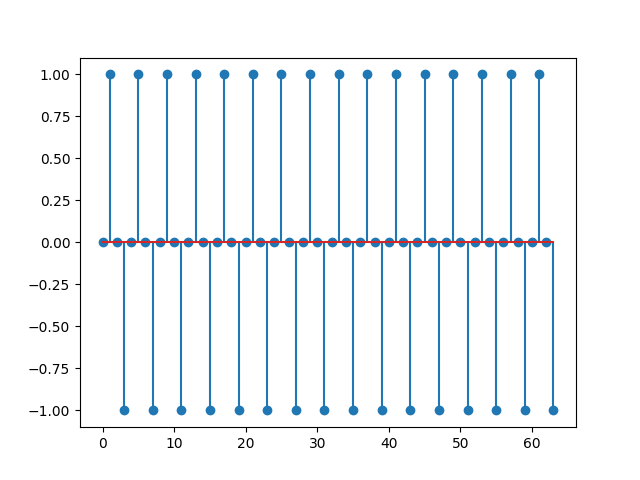

In [189]:
f0 = 0.5 * 1e6 #MHz
dT = 0.5 * 1e-6 #us

mSignal = np.array([np.sin(2 * np.pi * f0 * dT * k) for k in range(math.floor(32 * 1e-6 / dT))], dtype = float)
print(len(mSignal))
dtft = np.fft.fft(mSignal, 2048)
mAxis = np.linspace(-0.5, 0.5, 2048)
plt.figure(figsize=[8, 3])
%matplotlib widget 
# plt.plot(mAxis, np.abs(dtft))
plt.stem(mSignal)
plt.show()

In [190]:

right, _ = mylib.find_max_with_index_in_range(mAxis, np.abs(dtft), -0.234, -0.22)
left, _ = mylib.find_max_with_index_in_range(mAxis, np.abs(dtft), -0.26, -0.24)

print(mAxis[right])
print(mAxis[left])
print(mAxis[right] - mAxis[left], 
      '- расстояние между соседними максимумами в нормированных частотах в двпф')

-0.22740595994137763
-0.24987787005373718
0.02247191011235955 - расстояние между соседними максимумами в нормированных частотах в двпф


In [191]:
cnt = mylib.find_zero_cnt_in_range(mAxis, np.abs(dtft), -1, 1)
cnt

62

In [192]:
leftFreq = mylib.find_zero_in_range(mAxis, np.abs(dtft), -0.27, -0.26)
rightFreq = mylib.find_zero_in_range(mAxis, np.abs(dtft), -0.24, -0.23)

#Необходимое число отсчетов для 16 сэмплов дпф
M = math.ceil(17 / (rightFreq - leftFreq))
print((rightFreq - leftFreq) * M)
print(M)

17.00830483634587
544


In [193]:
dpf = np.fft.fft(mSignal) / len(mSignal)
mAxisDpf = np.arange(len(dpf))
plt.stem(mAxisDpf, np.abs(dpf))
print(len(dpf))

64


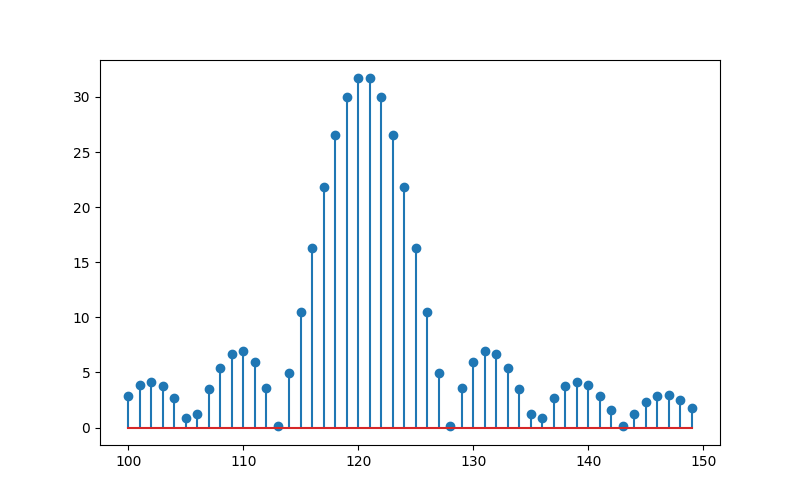

544


In [194]:
mSignal = add_zeros(mSignal, 482 - 64)
newDpf = np.fft.fft(mSignal)
mAxisNewDpf = np.arange(len(newDpf))
%matplotlib widget
plt.figure(figsize=[8, 5])
a = 100
b = 140
# plt.stem(mAxisNewDpf[a:b], np.abs(newDpf[a:b]))
sl = slice(100,150)
plt.stem(mAxisNewDpf[sl], np.abs(newDpf[sl]))
plt.show()
# print(np.abs(newDpf))
print(M)

In [195]:
import math
n = 1024
fastOps = n * (3 * math.log(n, 4) + 1)
slowOps = n * n
boost = slowOps / fastOps   
boost

64.0

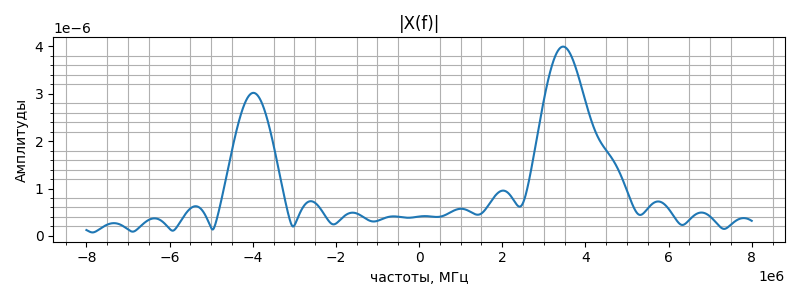

In [196]:
T = 1e-6
f1 = 3.5e6
f0 = 4e6

def sinc(x, eps=1e-6):
    if np.abs(x) < eps:
        return 1
    else:
        return np.sin(x) / x

mAxis = np.linspace(-2 * f0, 2 * f0, 10000)
def base_func(axis, shift):
    return np.array([T * sinc(np.pi * T * (f + shift - f0)) * (1.5 + 2.5j) + \
                     T * sinc(np.pi * T * (f + shift + f0)) * (1.5 - 2.5j) - \
                     9 / 2 * T * sinc(np.pi * T * (f + shift - f1)) for f in axis], dtype=complex)
    
mSpectre = base_func(mAxis, 0)

plot(mAxis, np.abs(mSpectre), "частоты, МГц", "Амплитуды", r"|X(f)|")
plt.savefig("1.jpeg")


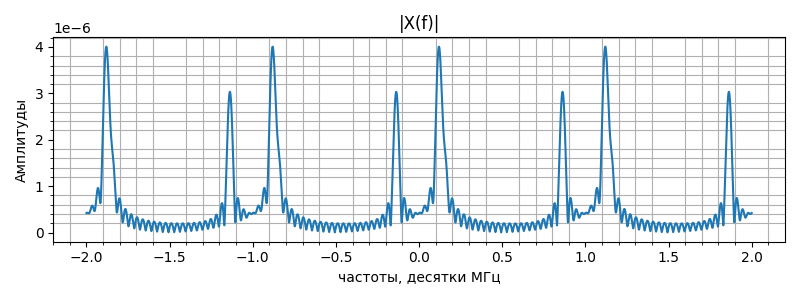

In [197]:
fs = 29e6
mAxis = np.linspace(-2 * fs, 2 * fs, 10000)
mSpectre = base_func(mAxis, 0)
for i in range(10):
    mSpectre += base_func(mAxis, (i + 1) * fs) + base_func(mAxis, (-i - 1) * fs)
    
plot(mAxis / fs, np.abs(mSpectre), "частоты, десятки МГц", "Амплитуды", r"|X(f)|")



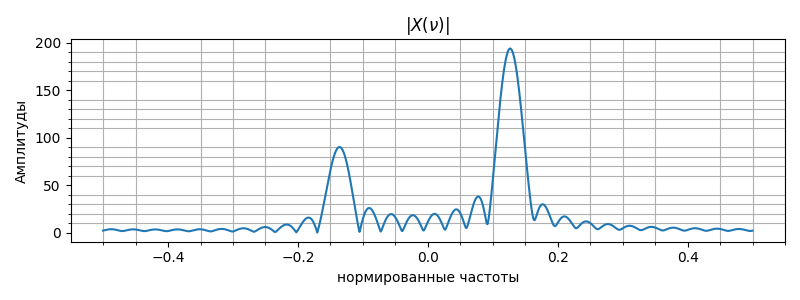

In [198]:
t = np.linspace(0, 1e-6, 30)
mSignal = -5 * np.sin(2 * np.pi * f0 * t) + 3 * np.cos(2 * np.pi * f0 * t) - 4.5 * np.exp(2j * np.pi * f1 * t)
mSpectre = np.fft.fftshift(np.fft.fft(mSignal, 2048))
mAxis = np.linspace(-1 / 2, 1 / 2, 2048)
plot(mAxis, np.abs(mSpectre), "нормированные частоты", "Амплитуды", r"$|X(\nu)|$")
plt.savefig("21.jpeg")


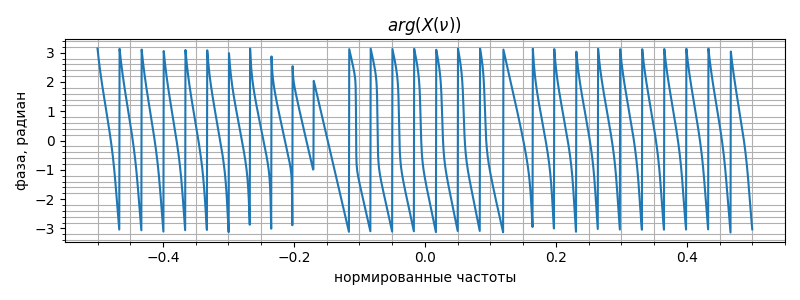

In [199]:
t = np.linspace(0, 1e-6, 30)
mSignal = -5 * np.sin(2 * np.pi * f0 * t) + 3 * np.cos(2 * np.pi * f0 * t) - 4.5 * np.exp(2j * np.pi * f1 * t)
mSpectre = np.fft.fftshift(np.fft.fft(mSignal, 2048))
mAxis = np.linspace(-1 / 2, 1 / 2, 2048)
plot(mAxis, np.angle(mSpectre), "нормированные частоты", "фаза, радиан", r"$arg(X(\nu))$")
plt.savefig("22.jpeg")


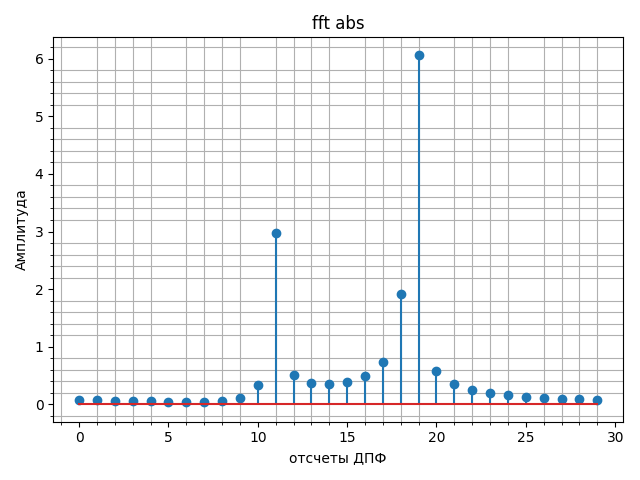

In [200]:
mSpectre = np.fft.fftshift(np.fft.fft(mSignal)) / 30
mAxis = np.arange(30)
%matplotlib widget
plt.stem(mAxis, np.abs(mSpectre))
plt.title("fft abs")
plt.xlabel("отсчеты ДПФ")
plt.ylabel("Амплитуда")
plt.tight_layout()
plt.minorticks_on()
plt.grid(True, "minor")
plt.show()

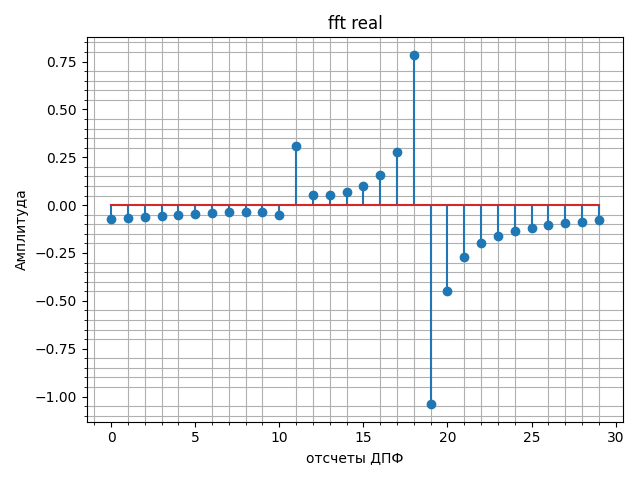

In [175]:
%matplotlib widget
plt.stem(mAxis, np.real(mSpectre))
plt.title("fft real")
plt.xlabel("отсчеты ДПФ")
plt.ylabel("Амплитуда")
plt.tight_layout()
plt.minorticks_on()
plt.grid(True, "minor")
plt.show()
plt.savefig("re.jpeg")

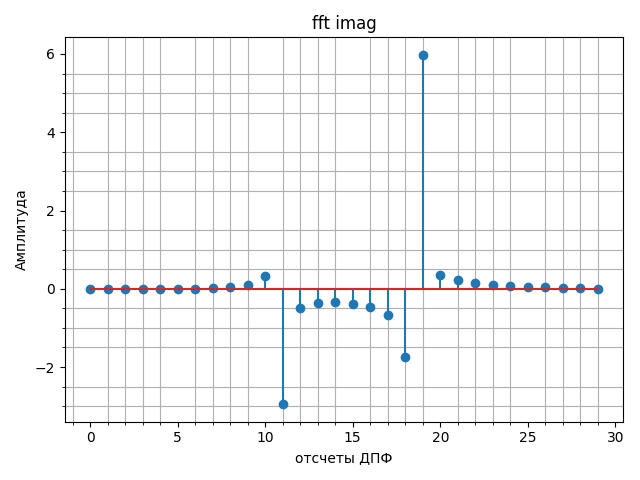

In [201]:
%matplotlib widget
plt.stem(mAxis, np.imag(mSpectre))
plt.title("fft imag")
plt.xlabel("отсчеты ДПФ")
plt.ylabel("Амплитуда")
plt.tight_layout()
plt.minorticks_on()
plt.grid(True, "minor")
plt.show()
plt.savefig("im.jpeg")